# Comparing CMIP6 and ERA5 surface temperature dataset for Leeds Met Office Hackathon - Ministry for Food and Agriculture, Ghana Group


26-5-21: Tom Webb, York University, tom.webb@york.ac.uk

Using iris to subset data, calculate anomaly and matplotlib to display it.

#### Imports

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

#### Set data paths

In [32]:
DATA_PATH = '/gws/pw/j05/cop26_hackathons/leeds/ministry/Tom_W/afr_T/'

DATA_PATH_2 = '/gws/pw/j05/cop26_hackathons/leeds/ministry/Tom_W/data/'


#### Load monthly surface temperature data into an Iris cube and calculate anomaly on selected baseline

In [33]:
# define constraint
hist_constraint = iris.Constraint(time=lambda cell: 1981 <= cell.point.year <= 2010)
constraint_lon = iris.Constraint(longitude=lambda v: v >= -3.0 and v <= 1.0 )
constraint_latS = iris.Constraint(latitude=lambda v: v >= 4.0 and v <= 7.0 )

constraint_latN = iris.Constraint(latitude=lambda v: v >= 7.0 and v <= 11.5 )
constraintN =  constraint_lon & constraint_latN 
constraintS =  constraint_lon & constraint_latS 

jja_constraint = iris.Constraint(clim_season='jja')

In [34]:
#observation processing

path= DATA_PATH_2 + 'era5_tas.nc'
air_temp = iris.load_cube(path , constraint=hist_constraint)
air_temp_mean = air_temp.collapsed('time', iris.analysis.MEAN) 
anomaly = air_temp - air_temp_mean

anomalyN = anomaly.extract(constraintN)
anomalyS = anomaly.extract(constraintS)

anomalyN.coord('longitude').guess_bounds()
anomalyN.coord('latitude').guess_bounds()
anomalyS.coord('longitude').guess_bounds()
anomalyS.coord('latitude').guess_bounds()

iris.coord_categorisation.add_season(anomalyN, 'time', name='clim_season')
iris.coord_categorisation.add_season_year(anomalyN, 'time', name='season_year')
season_cubeN = anomalyN.aggregated_by(
        ['clim_season', 'season_year'], 
        iris.analysis.MEAN)
    
iris.coord_categorisation.add_season(anomalyS, 'time', name='clim_season')
iris.coord_categorisation.add_season_year(anomalyS, 'time', name='season_year')
season_cubeS = anomalyS.aggregated_by(
        ['clim_season', 'season_year'], 
        iris.analysis.MEAN)

N_Guana_jja = season_cubeN.extract(jja_constraint)
S_Guana_jja = season_cubeS.extract(jja_constraint)

grid_area_weights = iris.analysis.cartography.area_weights(N_Guana_jja)
N_Guana_mean_era = N_Guana_jja.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)
    
grid_area_weights = iris.analysis.cartography.area_weights(S_Guana_jja)
S_Guana_mean_era = S_Guana_jja.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)


/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [82]:
# Load CMIP6 models

models = ['ACCESS-CM2','GISS-E2-1-G', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
          'CESM2', 'CNRM-ESM2-1', 'FGOALS-f3-L', 'FGOALS-g3', 'INM-CM5-0', 'INM-CM4-8', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM',
          'NorESM2-MM']  # no data in MIROC6, IPSL-CM6A-LR, NESM3, SAM0-UNICON, , 'UKESM1-0-LL' directories (CNRM-CM6-1, MPI-ESM-1-2-HAM,'NorCPM1', 'TaiESM1' coord error later, 'HadGEM3-GC31-MM')
#models = ['ACCESS-CM2']
print(len(models))

18


ACCESS-CM2


/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


GISS-E2-1-G


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


ACCESS-ESM1-5


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


BCC-CSM2-MR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


BCC-ESM1


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CAMS-CSM1-0


/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CanESM5


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CESM2


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CNRM-ESM2-1


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


FGOALS-f3-L


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


FGOALS-g3


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


INM-CM5-0


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


INM-CM4-8


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MPI-ESM1-2-HR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MPI-ESM1-2-LR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MRI-ESM2-0


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


NorESM2-LM


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


NorESM2-MM


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


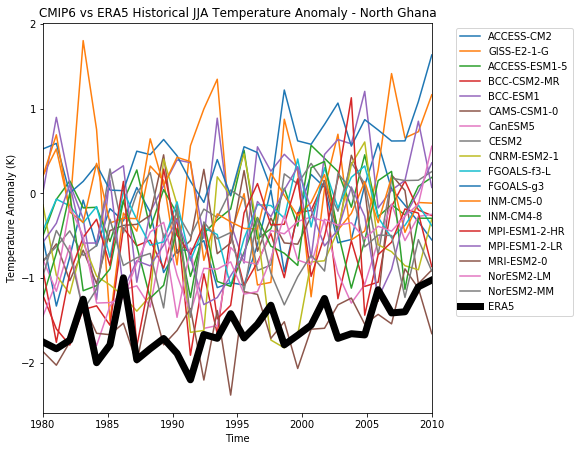

In [91]:
#model processing
plt.figure(figsize=(8,6))

for model in models[0:]:   # remove the '2' for all models
    print(model)   
    path = DATA_PATH+ model+'tas.nc'
        
    #calculate baseline over climatological period in unrestricted domain
    air_temp = iris.load_cube(path , constraint=hist_constraint)
    air_temp_mean = air_temp.collapsed('time', iris.analysis.MEAN) 
    anomaly = air_temp - air_temp_mean
    
    #apply domain constraints to cube
    anomalyN = anomaly.extract(constraintN)
    
    iris.coord_categorisation.add_season(anomalyN, 'time', name='clim_season')
    iris.coord_categorisation.add_season_year(anomalyN, 'time', name='season_year')
    season_cubeN = anomalyN.aggregated_by(
        ['clim_season', 'season_year'], 
        iris.analysis.MEAN)
    
    N_Guana_jja = season_cubeN.extract(jja_constraint)
    
    grid_area_weights = iris.analysis.cartography.area_weights(N_Guana_jja)
    N_Guana_mean = N_Guana_jja.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)
    
     
    x=np.linspace(1980,2010,30)       
    plt.plot(x,N_Guana_mean.data, label=model)
    

x=np.linspace(1980,2010,30)
plt.plot(x,N_Guana_mean_era.data, color='k', label='ERA5',linewidth=7.0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('CMIP6 vs ERA5 Historical JJA Temperature Anomaly - North Ghana')
plt.ylabel ('Temperature Anomaly (K)')
plt.xlabel('Time')
plt.xlim(1980,2010)
plt.savefig('temp_anomaly_ts_N.jpg', dpi=200)
plt.show()



ACCESS-CM2


/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


GISS-E2-1-G


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


ACCESS-ESM1-5


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


BCC-CSM2-MR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


BCC-ESM1


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CAMS-CSM1-0


/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CanESM5


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CESM2


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


CNRM-ESM2-1


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


FGOALS-f3-L


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


FGOALS-g3


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


INM-CM5-0


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


INM-CM4-8


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MPI-ESM1-2-HR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MPI-ESM1-2-LR


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


MRI-ESM2-0


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


NorESM2-LM


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))


NorESM2-MM


/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


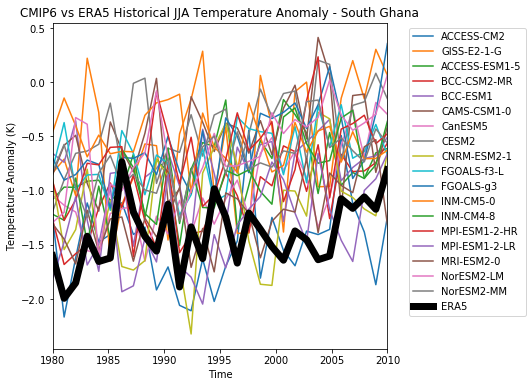

In [89]:
plt.figure(figsize=(8,6))
for model in models[0:]:   # remove the '2' for all models
    print(model)   
    path = DATA_PATH+ model+'tas.nc'
        
    #calculate baseline over climatological period in unrestricted domain
    air_temp = iris.load_cube(path , constraint=hist_constraint)
    air_temp_mean = air_temp.collapsed('time', iris.analysis.MEAN) 
    anomaly = air_temp - air_temp_mean
    
    #apply domain constraints to cube
    anomalyS = anomaly.extract(constraintS)
    
    iris.coord_categorisation.add_season(anomalyS, 'time', name='clim_season')
    iris.coord_categorisation.add_season_year(anomalyS, 'time', name='season_year')
    season_cubeS = anomalyS.aggregated_by(
        ['clim_season', 'season_year'], 
        iris.analysis.MEAN)
    
    S_Guana_jja = season_cubeS.extract(jja_constraint)
    
    grid_area_weights = iris.analysis.cartography.area_weights(S_Guana_jja)
    S_Guana_mean = S_Guana_jja.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)
    x=np.linspace(1980,2010,30)    
    plt.plot(x,S_Guana_mean.data, label=model)


x=np.linspace(1980,2010,30)
plt.plot(x,S_Guana_mean_era.data, color='k', label='ERA5',linewidth=7.0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('CMIP6 vs ERA5 Historical JJA Temperature Anomaly - South Ghana')
plt.ylabel ('Temperature Anomaly (K)')
plt.xlabel('Time')
plt.xlim(1980,2010)
plt.savefig('temp_anomaly_ts_S.jpg', dpi=200)
plt.show()
